##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [ ]:
!pip install numpy==1.24.4

In [ ]:
!pip install -q mediapipe

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [ ]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

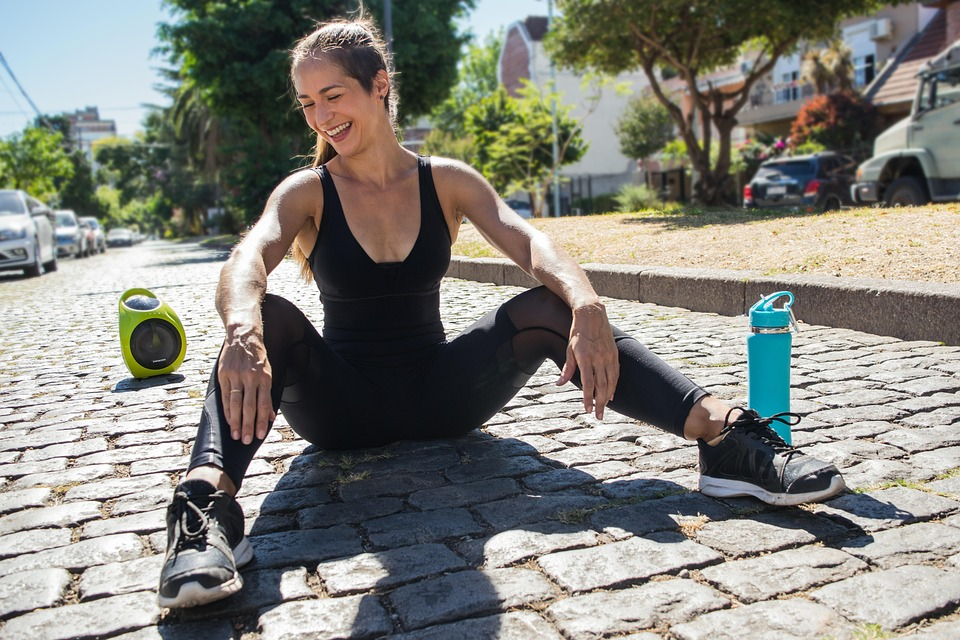

In [ ]:
#!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

#import cv2
#from google.colab.patches import cv2_imshow

#img = cv2.imread("image.jpg")
#cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

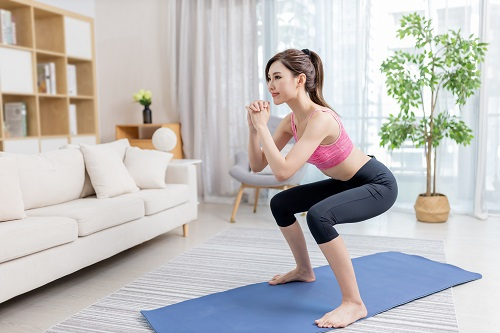

In [ ]:
from google.colab import files
#uploaded = files.upload()

#for filename in uploaded:
#  content = uploaded[filename]
#  with open(filename, 'wb') as f:
#    f.write(content)
#if len(uploaded.keys()):
#  IMAGE_FILE = next(iter(uploaded))
#  print('Uploaded file:', IMAGE_FILE)

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/KakaoTalk_20250325_190109677.jpg")
cv2_imshow(img)

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


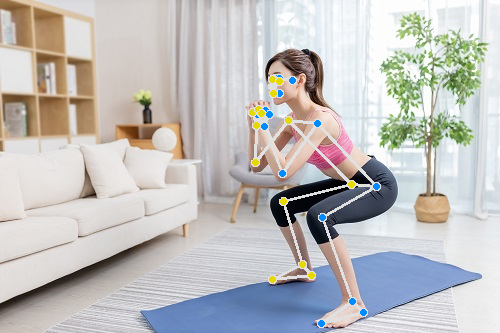

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("/content/KakaoTalk_20250325_190109677.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Visualize the pose segmentation mask.

In [ ]:
# 각 랜드마크의 (x, y, z) 좌표 출력
for idx, pose_landmarks in enumerate(detection_result.pose_landmarks):
    print(f"Person {idx + 1}:")
    for i, landmark in enumerate(pose_landmarks):
        print(f"  Landmark {i}: (x={landmark.x}, y={landmark.y}, z={landmark.z})")


Person 1:
  Landmark 0: (x=0.5450378656387329, y=0.26113057136535645, z=-0.20304840803146362)
  Landmark 1: (x=0.5507463216781616, y=0.23607808351516724, z=-0.2114609032869339)
  Landmark 2: (x=0.5544482469558716, y=0.23561713099479675, z=-0.21175043284893036)
  Landmark 3: (x=0.558973491191864, y=0.23536372184753418, z=-0.21175885200500488)
  Landmark 4: (x=0.545982837677002, y=0.23834165930747986, z=-0.17911118268966675)
  Landmark 5: (x=0.5451750159263611, y=0.23896726965904236, z=-0.1795012205839157)
  Landmark 6: (x=0.544092059135437, y=0.23973619937896729, z=-0.1797017902135849)
  Landmark 7: (x=0.584148645401001, y=0.24319714307785034, z=-0.2061571329832077)
  Landmark 8: (x=0.5582824945449829, y=0.24612706899642944, z=-0.06334871053695679)
  Landmark 9: (x=0.5598926544189453, y=0.2816983759403229, z=-0.19883190095424652)
  Landmark 10: (x=0.5478382110595703, y=0.2817396819591522, z=-0.15926168859004974)
  Landmark 11: (x=0.6354637742042542, y=0.37033045291900635, z=-0.252114355

In [ ]:
import math

def calculate_angle(a, b, c):
    """
    세 점 a, b, c에 대해 벡터 BA와 BC 사이의 각도를 계산합니다.
    a, b, c는 (x, y, z) 좌표를 갖는 튜플 또는 리스트입니다.
    """
    ba = [a[i] - b[i] for i in range(3)]
    bc = [c[i] - b[i] for i in range(3)]

    # 벡터 내적과 크기 계산
    dot_product = sum(ba[i] * bc[i] for i in range(3))
    mag_ba = math.sqrt(sum(ba[i] ** 2 for i in range(3)))
    mag_bc = math.sqrt(sum(bc[i] ** 2 for i in range(3)))

    # 0으로 나누는 것을 방지
    if mag_ba * mag_bc == 0:
        return None

    # 각도 계산 (라디안 -> 도)
    cos_angle = dot_product / (mag_ba * mag_bc)
    # 범위 보정 (부동소수점 오류 방지)
    cos_angle = max(min(cos_angle, 1.0), -1.0)
    angle_rad = math.acos(cos_angle)
    angle_deg = math.degrees(angle_rad)
    return angle_deg

# 예시: Person 1에 대해 무릎과 엉덩이 각도 계산
pose = detection_result.pose_landmarks[0]

# 필요한 좌표 추출
hip = [pose[24].x, pose[24].y, pose[24].z]
knee = [pose[26].x, pose[26].y, pose[26].z]
ankle = [pose[28].x, pose[28].y, pose[28].z]
shoulder = [pose[12].x, pose[12].y, pose[12].z]

# 각도 계산
knee_angle = calculate_angle(hip, knee, ankle)
hip_angle = calculate_angle(shoulder, hip, knee)

print(f"오른쪽 무릎 각도 (24-26-28): {knee_angle:.1f}")
print(f"오른쪽 엉덩이 각도 (12-24-26): {hip_angle:.2f}")


오른쪽 무릎 각도 (24-26-28): 97.5
오른쪽 엉덩이 각도 (12-24-26): 73.23


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import time
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io
from IPython.display import display, Javascript

# MediaPipe Pose 설정
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# 웹캠에서 프레임을 가져오는 JavaScript 코드
def video_stream():
    js = Javascript('''
        async function startStream() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const ctx = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            video.srcObject = stream;
            await video.play();

            document.body.appendChild(video);
            document.body.appendChild(canvas);
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;

            function captureFrame() {
                ctx.drawImage(video, 0, 0, canvas.width, canvas.height);
                return canvas.toDataURL('image/jpeg', 0.8);
            }

            return new Promise((resolve) => {
                setInterval(() => resolve(captureFrame()), 100);
            });
        }
    ''')
    display(js)
    return eval_js('startStream()')

# 웹캠 프레임 가져오기
def process_frame():
    frame_data = video_stream()
    binary = b64decode(frame_data.split(',')[1])
    image = PIL.Image.open(io.BytesIO(binary))
    image = np.array(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV용 BGR 변환

# 두 점 간의 거리 계산 함수
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# OK 제스처 감지 여부
def is_ok_gesture(landmarks):
    if landmarks:
        wrist = landmarks[mp_pose.PoseLandmark.WRIST.value]
        thumb_tip = landmarks[mp_pose.PoseLandmark.THUMB_TIP.value]
        index_tip = landmarks[mp_pose.PoseLandmark.INDEX_FINGER_TIP.value]

        # 엄지와 검지의 거리 계산
        distance_thumb_index = calculate_distance(thumb_tip, index_tip)

        # 특정 거리 이하면 "OK 제스처"로 판단
        if distance_thumb_index < 0.05:  # (값은 조정 가능)
            print("OK 제스처 감지됨! 스트리밍을 종료합니다.")
            return True
    return False

# 실시간 Pose Detection 실행
frame_count = 0
max_frames = 30  # 최대 프레임 수 (OK 감지 전에 종료 방지)
ok_detected_count = 0  # OK 제스처 감지 횟수 (연속 감지 여부 확인)
ok_threshold = 5  # 연속 OK 감지 횟수 기준

while frame_count < max_frames:
    frame = process_frame()

    # 포즈 감지
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    frame_landmarks = []
    if results.pose_landmarks:
        # 랜드마크 저장
        for landmark in results.pose_landmarks.landmark:
            frame_landmarks.append((landmark.x, landmark.y))

        # OK 제스처 감지
        if is_ok_gesture(frame_landmarks):
            ok_detected_count += 1
        else:
            ok_detected_count = 0  # 감지 실패 시 초기화

        # OK 제스처 일정 횟수 이상 감지 시 종료
        if ok_detected_count >= ok_threshold:
            print("✅ 연속 OK 제스처 감지! 스트리밍을 종료합니다.")
            break

        # 랜드마크 화면에 표시
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # 실시간 출력 (Colab 환경에서 cv2.imshow 대신 cv2_imshow 사용)
    cv2_imshow(frame)

    frame_count += 1  # 프레임 개수 증가
    print(f"📸 현재 프레임: {frame_count}/{max_frames}")

# 기존 비디오 요소 제거하는 JavaScript 추가
def remove_video_elements():
    js = Javascript('''
        function removeVideos() {
            let videos = document.querySelectorAll('video');
            let canvases = document.querySelectorAll('canvas');
            videos.forEach(video => video.remove());
            canvases.forEach(canvas => canvas.remove());
        }
        removeVideos();
    ''')
    display(js)

# 종료 메시지
print("🚀 OK 제스처 감지로 인해 스트리밍을 종료합니다.")

# 비디오 요소 제거
remove_video_elements()


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import time
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io
from IPython.display import display, Javascript

# MediaPipe Pose 설정
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# 웹캠에서 프레임을 가져오는 JavaScript 코드
def video_stream():
    js = Javascript('''
        async function startStream() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const ctx = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            video.srcObject = stream;
            await video.play();

            document.body.appendChild(video);
            document.body.appendChild(canvas);
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;

            function captureFrame() {
                ctx.drawImage(video, 0, 0, canvas.width, canvas.height);
                return canvas.toDataURL('image/jpeg', 0.8);
            }

            return new Promise((resolve) => {
                setInterval(() => resolve(captureFrame()), 100);
            });
        }
    ''')
    display(js)
    return eval_js('startStream()')

# 웹캠 프레임 가져오기
def process_frame():
    frame_data = video_stream()
    binary = b64decode(frame_data.split(',')[1])
    image = PIL.Image.open(io.BytesIO(binary))
    image = np.array(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV용 BGR 변환

# 실시간 Pose Detection 실행 (총 10개 프레임 후 종료 & 랜드마크 반환)
frame_count = 0
max_frames = 10  # 캡처할 프레임 개수
landmark_list = []  # 랜드마크 저장 리스트

while frame_count < max_frames:
    frame = process_frame()

    # 포즈 감지
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    frame_landmarks = []
    if results.pose_landmarks:
        # 랜드마크 감지 후 저장
        for landmark in results.pose_landmarks.landmark:
            frame_landmarks.append((landmark.x, landmark.y, landmark.z))

        # 프레임 번호와 함께 저장
        landmark_list.append((frame_count, frame_landmarks))

        # 랜드마크 화면에 표시
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # 실시간 출력 (Colab 환경에서 cv2.imshow 대신 cv2_imshow 사용)
    cv2_imshow(frame)

    frame_count += 1  # 프레임 개수 증가
    print(f"📸 현재 프레임: {frame_count}/{max_frames}")

# 기존 비디오 요소 제거하는 JavaScript 추가
def remove_video_elements():
    js = Javascript('''
        function removeVideos() {
            let videos = document.querySelectorAll('video');
            let canvases = document.querySelectorAll('canvas');
            videos.forEach(video => video.remove());
            canvases.forEach(canvas => canvas.remove());
        }
        removeVideos();
    ''')
    display(js)

# 종료 메시지
print("!!!!!!!!!!!!!!10개의 프레임을 처리 완료했습니다. 스트리밍을 종료합니다.!!!!!!!!!!!!!!!!!!!")

# 랜드마크 데이터 반환
print(f"📌 총 {len(landmark_list)}개 프레임의 랜드마크 데이터가 저장되었습니다!")
for i, (frame_idx, landmarks) in enumerate(landmark_list[:9]):  # 좌표 출력
    print(f"🖼 프레임 {frame_idx} - 첫 번째 랜드마크 좌표: {landmarks[0]}")

landmark_list  # 랜드마크 데이터 반환
remove_video_elements()  # 남아 있는 영상 요소 삭제
